In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
p300=pd.read_csv("P300/online/2021-08-07-17-02-44/2021-08-07-17-02-44_raw_eeg.csv")
plat=pd.read_csv("2021-08-07-17-02-44_weight.csv")

## Try search and insert begin new sessions

In [168]:
def Insert_row(row_number, df, row_value):
    start_upper = 0
    end_upper = row_number
    start_lower = row_number
    end_lower = df.shape[0]
    upper_half = [*range(start_upper, end_upper, 1)]
    lower_half = [*range(start_lower, end_lower, 1)]
    lower_half = [x.__add__(1) for x in lower_half]
    index_ = upper_half + lower_half
    df.index = index_
    df.loc[row_number] = row_value
    df = df.sort_index()
    return df

In [173]:
final=p300.merge(plat,on="timestamp")
final=final[(final.TARGET_ID==10)]
final = pd.DataFrame(np.repeat(final.values, 5, axis=0), columns=final.columns).astype(final.dtypes)
final.rename(columns={'weight (kg)':'weight','coordinate_X (mm)': 'X','coordinate_Y (mm)': 'Y'}, inplace=True)

index_s=final.id
ind=[]
for i in range(len(index_s)-1):
    if(abs(index_s[i+1]-index_s[i])>1000):
        ind.append(i)

for i in ind:
    row_value = pd.Series(np.full(shape=len(final.columns), fill_value=np.nan))
    final=final.append(row_value, ignore_index=True)

final
    
    

,id,timestamp,STIMULUS_ID,TARGET_ID,A1 (ref),P3,PZ,P4,B1+,B1-,...,29,30,31,32,33,34,35,36,37,38
0,1034388.0,1.628345e+12,1.0,10.0,27.603577,-15.272245,50.992257,23.573061,-6.456059,97.932612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1034388.0,1.628345e+12,1.0,10.0,27.603577,-15.272245,50.992257,23.573061,-6.456059,97.932612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1034388.0,1.628345e+12,1.0,10.0,27.603577,-15.272245,50.992257,23.573061,-6.456059,97.932612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1034388.0,1.628345e+12,1.0,10.0,27.603577,-15.272245,50.992257,23.573061,-6.456059,97.932612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1034388.0,1.628345e+12,1.0,10.0,27.603577,-15.272245,50.992257,23.573061,-6.456059,97.932612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,1351191.0,1.628345e+12,-1.0,10.0,-63.491133,-95.273832,-72.301496,-45.248164,-38.043538,89.510958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4679,1351191.0,1.628345e+12,-1.0,10.0,-63.491133,-95.273832,-72.301496,-45.248164,-38.043538,89.510958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
arr = np.full(shape=len(final.columns), fill_value=np.nan)
arr

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

# TARGET=10

In [176]:
final=p300.merge(plat,on="timestamp")
final=final[(final.TARGET_ID==10)]
final = pd.DataFrame(np.repeat(final.values, 5, axis=0), columns=final.columns).astype(final.dtypes)
final.rename(columns={'weight (kg)':'weight','coordinate_X (mm)': 'X','coordinate_Y (mm)': 'Y'}, inplace=True)

index_s=final.id
ind=[]

for i in range(len(index_s)-1):
    if(abs(index_s[i+1]-index_s[i])>1000):
        ind.append(i)
final

,id,timestamp,STIMULUS_ID,TARGET_ID,A1 (ref),P3,PZ,P4,B1+,B1-,weight,X,Y
0,1034388,1628344996181,1,10,27.603577,-15.272245,50.992257,23.573061,-6.456059,97.932612,61.698,-3.639,-21.348
1,1034388,1628344996181,1,10,27.603577,-15.272245,50.992257,23.573061,-6.456059,97.932612,61.698,-3.639,-21.348
2,1034388,1628344996181,1,10,27.603577,-15.272245,50.992257,23.573061,-6.456059,97.932612,61.698,-3.639,-21.348
3,1034388,1628344996181,1,10,27.603577,-15.272245,50.992257,23.573061,-6.456059,97.932612,61.698,-3.639,-21.348
4,1034388,1628344996181,1,10,27.603577,-15.272245,50.992257,23.573061,-6.456059,97.932612,61.698,-3.639,-21.348
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,1351191,1628345136981,-1,10,-63.491133,-95.273832,-72.301496,-45.248164,-38.043538,89.510958,61.879,-5.357,-12.000
4676,1351191,1628345136981,-1,10,-63.491133,-95.273832,-72.301496,-45.248164,-38.043538,89.510958,61.879,-5.357,-12.000
4677,1351191,1628345136981,-1,10,-63.491133,-95.273832,-72.301496,-45.248164,-38.043538,89.510958,61.879,-5.357,-12.000
4678,1351191,1628345136981,-1,10,-63.491133,-95.273832,-72.301496,-45.248164,-38.043538,89.510958,61.879,-5.357,-12.000


## weight(timestamp)

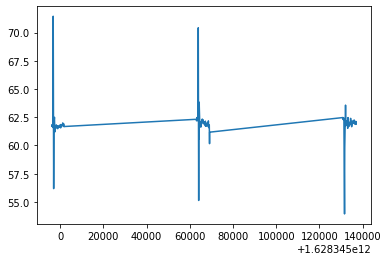

In [177]:
plt.plot(final.timestamp,final.weight)

## x(timestamp), y(timestamp)

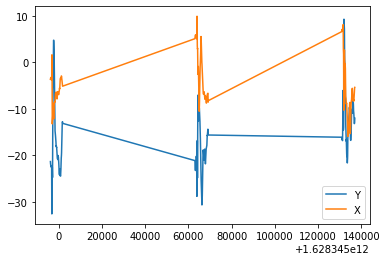

In [178]:
plt.plot(final.timestamp,final.Y,label='Y')
plt.plot(final.timestamp,final.X,label='X')
plt.legend(loc='best')
plt.show()

## x(y)

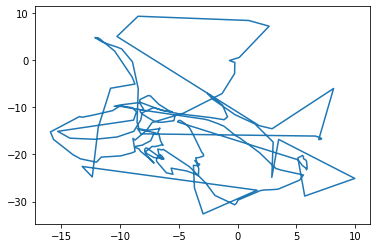

In [179]:
plt.plot(final.X,final.Y)

# Save final file

In [180]:
final.to_csv('final-target10.csv')

# TARGET=11

In [181]:
final=p300.merge(plat,on="timestamp")
final=final[(final.TARGET_ID==11)]
final = pd.DataFrame(np.repeat(final.values, 5, axis=0), columns=final.columns).astype(final.dtypes)
final.rename(columns={'weight (kg)':'weight','coordinate_X (mm)': 'X','coordinate_Y (mm)': 'Y'}, inplace=True)
final

,id,timestamp,STIMULUS_ID,TARGET_ID,A1 (ref),P3,PZ,P4,B1+,B1-,weight,X,Y
0,983484,1628344973557,1,11,-52.421838,-22.617859,-29.732167,62.953944,44.612920,93.060791,61.973,4.918,-22.594
1,983484,1628344973557,1,11,-52.421838,-22.617859,-29.732167,62.953944,44.612920,93.060791,61.973,4.918,-22.594
2,983484,1628344973557,1,11,-52.421838,-22.617859,-29.732167,62.953944,44.612920,93.060791,61.973,4.918,-22.594
3,983484,1628344973557,1,11,-52.421838,-22.617859,-29.732167,62.953944,44.612920,93.060791,61.973,4.918,-22.594
4,983484,1628344973557,1,11,-52.421838,-22.617859,-29.732167,62.953944,44.612920,93.060791,61.973,4.918,-22.594
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,1300575,1628345114485,-1,11,8.587936,-17.882179,-48.225002,-11.439152,18.328143,-52.595665,61.573,-3.284,-16.589
4116,1300575,1628345114485,-1,11,8.587936,-17.882179,-48.225002,-11.439152,18.328143,-52.595665,61.573,-3.284,-16.589
4117,1300575,1628345114485,-1,11,8.587936,-17.882179,-48.225002,-11.439152,18.328143,-52.595665,61.573,-3.284,-16.589
4118,1300575,1628345114485,-1,11,8.587936,-17.882179,-48.225002,-11.439152,18.328143,-52.595665,61.573,-3.284,-16.589


## weight(timestamp)

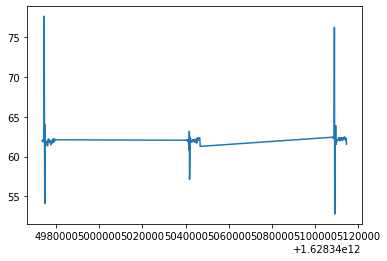

In [182]:
plt.plot(final.timestamp,final.weight)

## x(timestamp), y(timestamp)

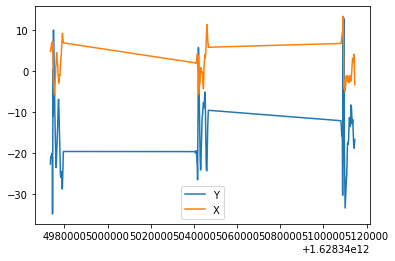

In [183]:
plt.plot(final.timestamp,final.Y,label='Y')
plt.plot(final.timestamp,final.X,label='X')
plt.legend(loc='best')
plt.show()

## x(y)

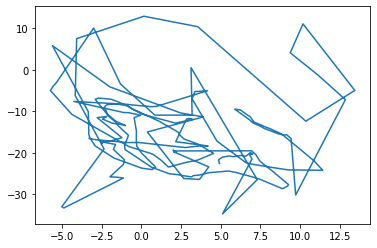

In [184]:
plt.plot(final.X,final.Y)

# Save final file

In [185]:
final.to_csv('final-target11.csv')

# TARGET=12

In [186]:
final=p300.merge(plat,on="timestamp")
final=final[(final.TARGET_ID==12)]
final = pd.DataFrame(np.repeat(final.values, 5, axis=0), columns=final.columns).astype(final.dtypes)
final.rename(columns={'weight (kg)':'weight','coordinate_X (mm)': 'X','coordinate_Y (mm)': 'Y'}, inplace=True)
final

,id,timestamp,STIMULUS_ID,TARGET_ID,A1 (ref),P3,PZ,P4,B1+,B1-,weight,X,Y
0,1083708,1628345018101,2,12,-77.921152,-2.737011,-42.205400,94.045391,65.667997,-68.288189,61.856,-2.375,-14.818
1,1083708,1628345018101,2,12,-77.921152,-2.737011,-42.205400,94.045391,65.667997,-68.288189,61.856,-2.375,-14.818
2,1083708,1628345018101,2,12,-77.921152,-2.737011,-42.205400,94.045391,65.667997,-68.288189,61.856,-2.375,-14.818
3,1083708,1628345018101,2,12,-77.921152,-2.737011,-42.205400,94.045391,65.667997,-68.288189,61.856,-2.375,-14.818
4,1083708,1628345018101,2,12,-77.921152,-2.737011,-42.205400,94.045391,65.667997,-68.288189,61.856,-2.375,-14.818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5735,1447743,1628345179893,-1,12,-35.676019,-38.117203,64.957008,-55.079687,-38.494844,11.623463,62.258,2.225,3.479
5736,1447743,1628345179893,-1,12,-35.676019,-38.117203,64.957008,-55.079687,-38.494844,11.623463,62.258,2.225,3.479
5737,1447743,1628345179893,-1,12,-35.676019,-38.117203,64.957008,-55.079687,-38.494844,11.623463,62.258,2.225,3.479
5738,1447743,1628345179893,-1,12,-35.676019,-38.117203,64.957008,-55.079687,-38.494844,11.623463,62.258,2.225,3.479


## weight(timestamp)

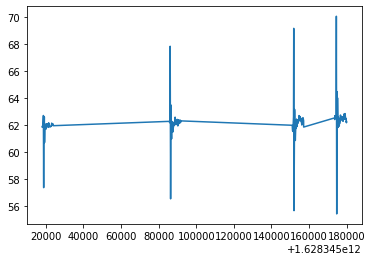

In [187]:
plt.plot(final.timestamp,final.weight)

## x(timestamp), y(timestamp)

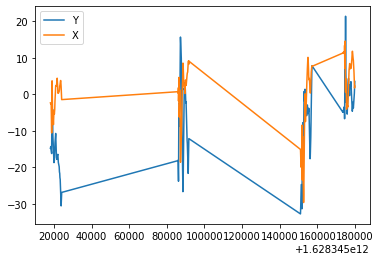

In [188]:
plt.plot(final.timestamp,final.Y,label='Y')
plt.plot(final.timestamp,final.X,label='X')
plt.legend(loc='best')
plt.show()

## x(y)

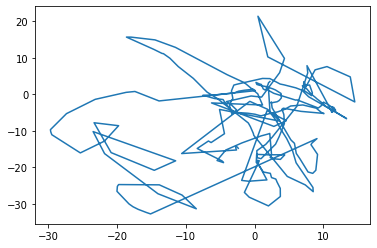

In [189]:
plt.plot(final.X,final.Y)

# Save final file

In [190]:
final.to_csv('final-target12.csv')